In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
chocolates = pd.read_csv('dados/chocolura.csv')
chocolates.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


## Analisando as Vendas

In [3]:
chocolates.dtypes

mes       object
vendas     int64
dtype: object

In [4]:
chocolates['mes'] = pd.to_datetime(chocolates['mes'])

In [5]:
print ('Quantidade de linhas e colunas:', chocolates.shape)
print ('Quantidade de dados nulos:', chocolates.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [6]:
chocolates['aumento'] = chocolates['vendas'].diff()
chocolates['aceleracao'] = chocolates['aumento'].diff()

In [7]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

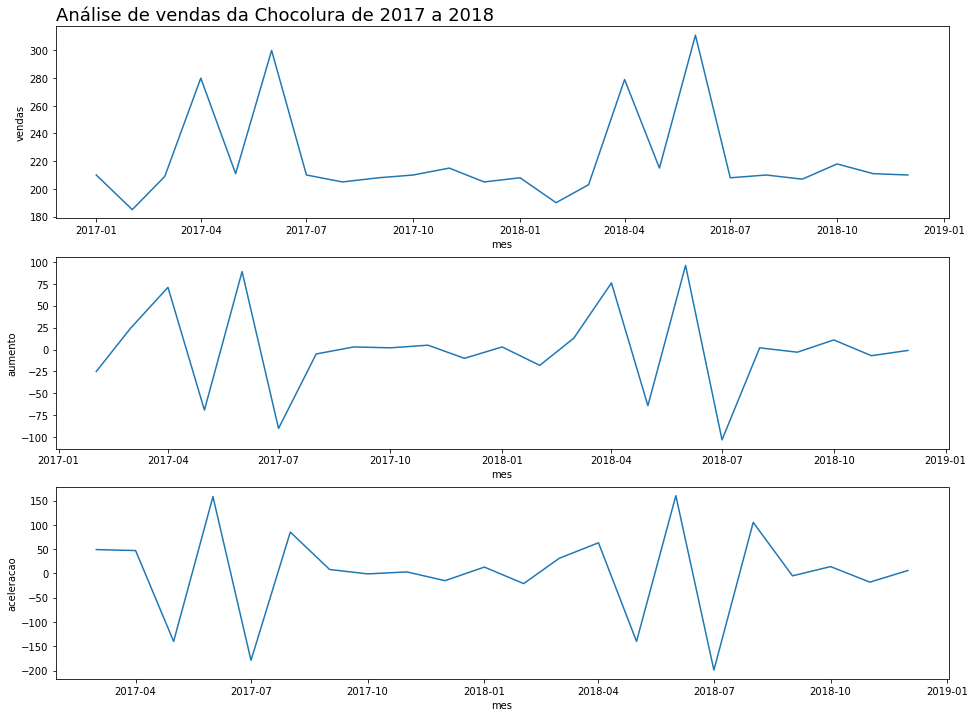

In [8]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolates, 'Análise de vendas da Chocolura de 2017 a 2018')

<p>Os gráficos apontam que há uma sazonalidade nas vendas, ou seja, períodos do ano em que as vendas são maiores, e outros em que são menores.</p>
<p>Nos meses de abril e junho as vendas costumam atingir os maiores índices. Em abril, ocorre a páscoa, ao passo quem em junho ocorre o dia dos namorados. De julho até março as vendas se estabilizam.</p>

## Investigando a sazonalidade

In [9]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [10]:
print ('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [11]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [12]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


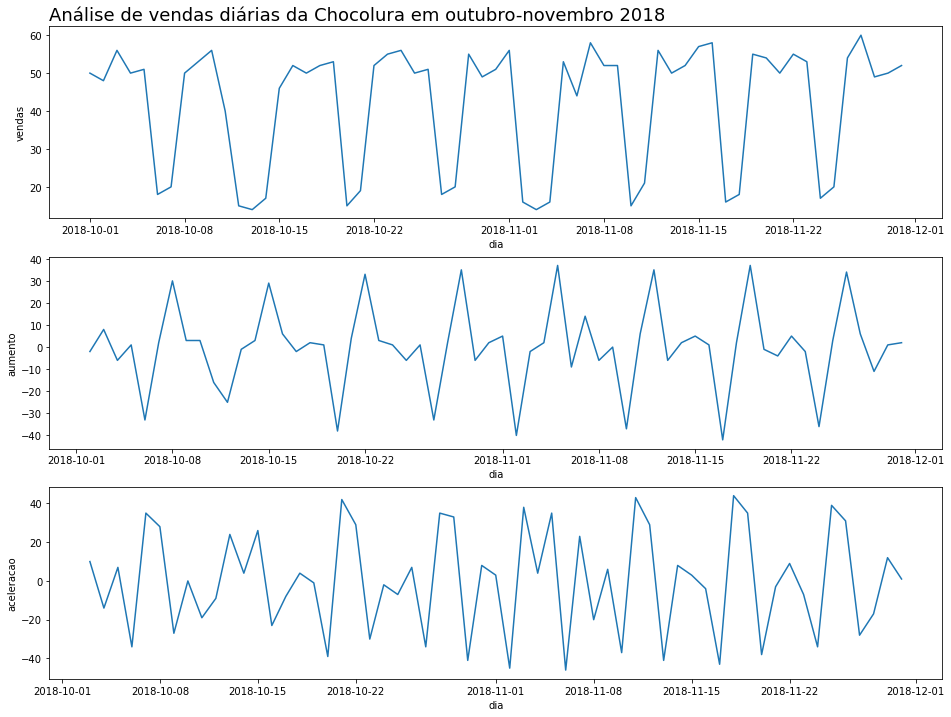

In [13]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 
                vendas_por_dia, 'Análise de vendas diárias da Chocolura em outubro-novembro 2018')

<p> Nota-se um padrão sazonal repetitivo </p>

In [14]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [15]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [16]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [17]:
dias_portugues = {'Monday': 'segunda', 'Tuesday': 'terca', 'Wednesday': 'quarta', 
                  'Thursday': 'quinta', 'Friday': 'sexta', 'Saturday': 'sabado',
                  'Sunday': 'domingo'}

In [18]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_portugues)
vendas_por_dia.head(20)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


## Analisando vendas por dia da semana

In [19]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/tmp/ipykernel_162612/759150623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


<p> A média das vendas cai nos fins de semana. Pode ter relação com a localização das lojas, que podem não estar situadas em pontos de grande movimentação, como os centros e shoppings; pode ter relação com estratégia de negócios, como redução de expediente aos fins de semana, ou de funcionários etc</p>